## Importing the IMDB dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [25]:
imdb_df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
#set style
imdb_df.head()

print(f"Full data set : {len(imdb_df)}")


Full data set : 50000


## Creating a stratified sample of the dataset

Since the dataset is more than 50k reviews we want to be able to review a smaller subset

In [27]:
# creating a stratified sample fo 25k reviews
imdb_df_25 = (
    imdb_df
    .groupby('sentiment', group_keys=False)
    .sample(n=12_500, random_state=42)
    .reset_index(drop=True)
)

print(f"Subsample size: {len(imdb_df_25)}")
print(imdb_df_25['sentiment'].value_counts())



Subsample size: 25000
sentiment
negative    12500
positive    12500
Name: count, dtype: int64


In [28]:
train_df, test_df = train_test_split(
    imdb_df_25,
    test_size=0.2,
    stratify=imdb_df_25['sentiment'],
    random_state=42
)

train_df = train_df.copy()
test_df = test_df.copy()

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Label distribution (train): {train_df['sentiment'].value_counts().to_dict()}")


Training samples: 20000
Test samples: 5000
Label distribution (train): {'positive': 10000, 'negative': 10000}


In [29]:
#Character length
train_df['review'] = train_df['review'].astype(str)
test_df['review'] = test_df['review'].astype(str)

train_df['char_length'] = train_df['review'].apply(len)
test_df['char_length'] = test_df['review'].apply(len)

train_df['char_length'].describe()


count    20000.000000
mean      1305.914300
std        979.235485
min         41.000000
25%        700.000000
50%        969.000000
75%       1596.000000
max      12129.000000
Name: char_length, dtype: float64

In [30]:
train_df['token_length'] = train_df['review'].apply(lambda x: len(x.split()))
test_df['token_length'] = test_df['review'].apply(lambda x: len(x.split()))

train_df['token_length'].describe()


count    20000.000000
mean       230.505900
std        169.531966
min          4.000000
25%        127.000000
50%        173.000000
75%        281.000000
max       2125.000000
Name: token_length, dtype: float64

In [31]:
train_df.groupby('sentiment')[['char_length', 'token_length']].describe()


char_length                                                        \
                count       mean          std   min     25%    50%      75%   
sentiment                                                                     
negative      10000.0  1295.3701   947.188019  41.0  708.00  971.5  1587.25   
positive      10000.0  1316.4585  1010.204259  65.0  691.75  967.0  1608.25   

                   token_length                                            \
               max        count      mean         std   min    25%    50%   
sentiment                                                                   
negative    7761.0      10000.0  229.6343  164.886222   4.0  128.0  174.0   
positive   12129.0      10000.0  231.3775  174.057644  10.0  124.0  171.5   

                          
             75%     max  
sentiment                 
negative   281.0  1376.0  
positive   281.0  2125.0

## Exploratory Data Analysis

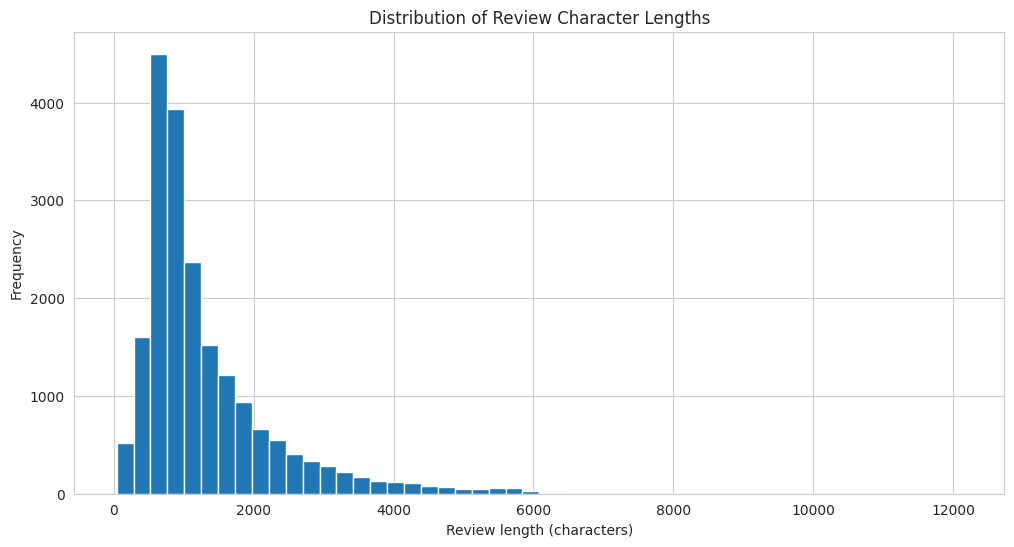

In [32]:
plt.hist(train_df['char_length'], bins=50)
plt.xlabel("Review length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Character Lengths")
plt.show()


In [ ]:
# Create stratified 10,000 sample subset (5000 train)
train_df = pd.df_25k(df_25k['train'])
test_df = pd.df_25k(df_25k['test'])


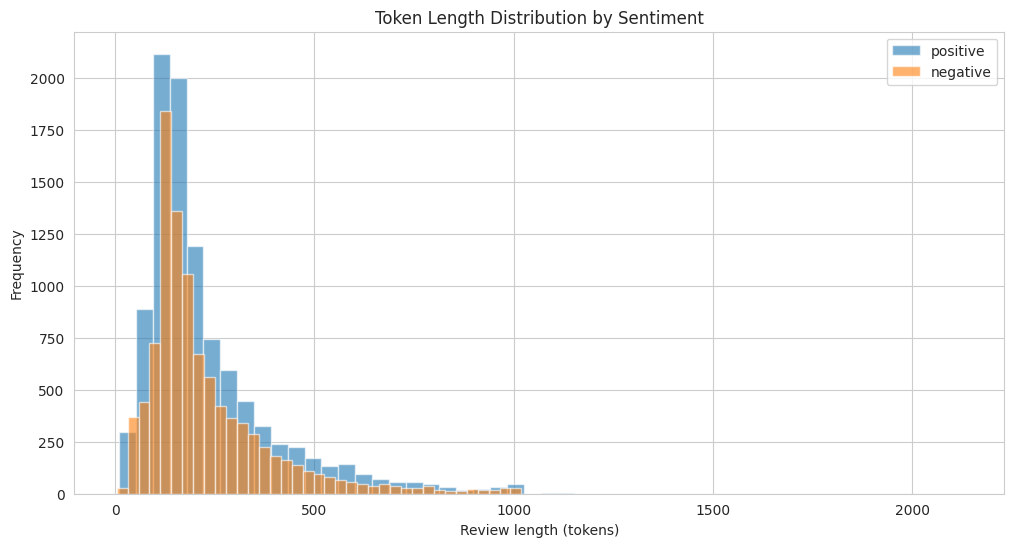

In [34]:
for label in train_df['sentiment'].unique():
    subset = train_df[train_df['sentiment'] == label]
    plt.hist(subset['token_length'], bins=50, alpha=0.6, label=label)

plt.xlabel("Review length (tokens)")
plt.ylabel("Frequency")
plt.title("Token Length Distribution by Sentiment")
plt.legend()
plt.show()
